#Stage 2   
VIP CUP   
______
**SPA Group**  
Sajjad Jabbarzade   
Parham Soltani    
Amirtaha Aghasi   

______   

##Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##Preparing Data   
Importing the Bottles.jpg into the Google VM Drive

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Bottles.jpg to Bottles.jpg


##Task 1

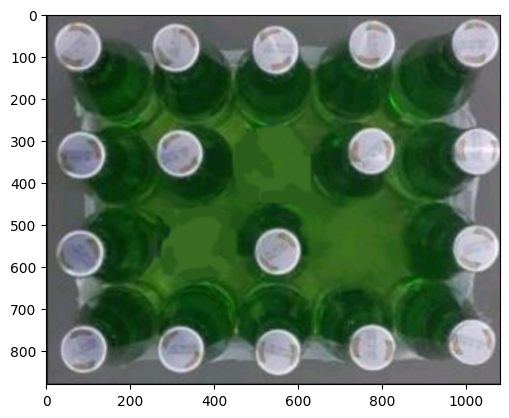

In [45]:
img = cv2.imread("Bottles.jpg",1)
plt.imshow(img[:,:,::-1])
plt.show()

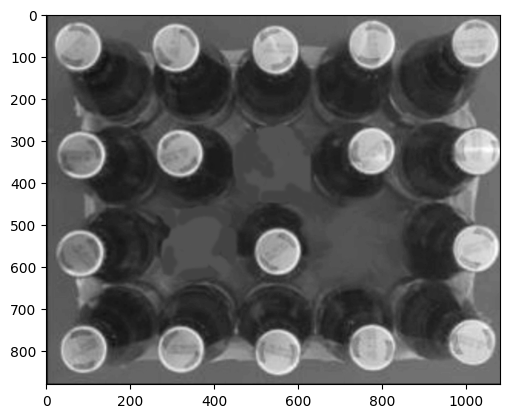

In [46]:
gray_bottle = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_bottle,cmap="gray")
plt.show()

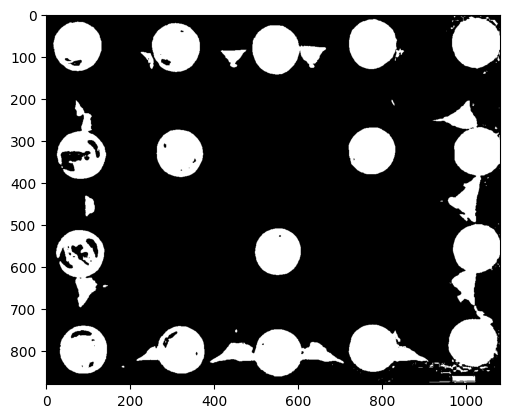

In [47]:
_, mask = cv2.threshold(gray_bottle, 115, 255, cv2.THRESH_BINARY)
plt.imshow(mask,cmap="gray")
plt.show()

In [48]:
w, h = 5, 4
img_div = [[0 for x in range(w)] for y in range(h)]
set_points_y = [0,214,450,620,860,1080]
set_points_x = [0,215,440,640,880]
q = 0
p = 0
for i in range(len(set_points_x)-1):
  for j in range(len(set_points_y)-1):
    img_div[p][q] = mask[set_points_x[i]:set_points_x[i+1]-1,set_points_y[j]:set_points_y[j+1]-1]
    q += 1
  q = 0
  p += 1

In [49]:
contours ,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
no_bottle = 0
for i in range(4):
  for j in range(5):
    contours_this_part ,_ = cv2.findContours(img_div[i][j],cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(contours_this_part) > 0:
      c = max(contours_this_part, key = cv2.contourArea)
    else:
      no_bottle += 1

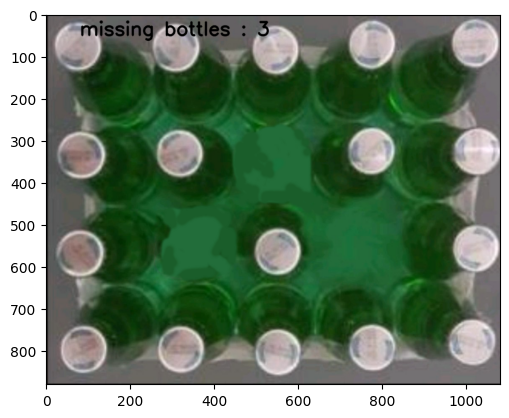

In [50]:
font = cv2.FONT_HERSHEY_SIMPLEX
org = (80, 50)
fontScale = 1.5
color = (0, 0, 0)
thickness = 3
cv2.putText(img, str("missing bottles : " + str(no_bottle)), org, font,
                   fontScale, color, thickness, cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [51]:
cv2.imwrite("Output.jpg", img)

True